In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import random
from random import sample
import math

# 导入数据并形成dataframe

In [29]:
clf_num = 2

In [30]:
features_path = "./三类特征统计"
labels_path = "./标签信息"
feature_sample = [[],[],[],[]]
filename_sample = [[],[],[],[]]
for videoname in sorted(os.listdir(features_path)):
    video_feature_path = os.path.join(features_path,videoname)
    label_path = os.path.join(labels_path,videoname+".txt")
    # 读取标签文件
    label = []
    with open(label_path,"r",encoding='utf-8') as f:
        while True:
            line = f.readline()
            if not line:
                break
            line = line.split('，')
            label.append(eval(line[1]))
    # 根据label读取每个clip的特征文件
    for i in range(len(label)):
        clipname = "clip"+str(i+1)+".txt"
        tmp_path = videoname+"/"+clipname
        clip_feature_path = os.path.join(video_feature_path,clipname)
        feature = np.loadtxt(clip_feature_path,delimiter=',')   # 读取feature文件
        feature_sample[label[i]-1].append(feature.tolist())
        filename_sample[label[i]-1].append(tmp_path)
#     print("类别1样本数量：",len(feature_sample[0]),"类别1文件数量：",len(filename_sample[0]))
#     print("类别2样本数量：",len(feature_sample[1]),"类别2文件数量：",len(filename_sample[1]))
#     print("类别3样本数量：",len(feature_sample[2]),"类别3文件数量：",len(filename_sample[2]))
#     print("类别4样本数量：",len(feature_sample[3]),"类别4文件数量：",len(filename_sample[3]))
# 对样本数据集进行k折划分
# 选择随机种子
random.seed(0)
if clf_num == 2:
    # 二分类
    class_name = ['No UEX Tendency','UEX Tendency']
    feature_sample_array = sample(feature_sample[0],361)+feature_sample[1]+feature_sample[3]
    label_array = [0]*len(sample(feature_sample[0],361))+[1]*len(feature_sample[1]+feature_sample[3])
    filename_sample_array = sample(filename_sample[0],361)+filename_sample[1]+filename_sample[3]
elif clf_num == 3:
    # 三分类
    class_name = ['No Movement State','No UEX Tendency','UEX Tendency']
    feature_sample_array = sample(feature_sample[0],159)+sample(feature_sample[1],159)+feature_sample[3]
    label_array = [0]*len(sample(feature_sample[0],159))+[1]*len(sample(feature_sample[1],159))+[2]*len(feature_sample[3])
    filename_sample_array = sample(filename_sample[0],159)+sample(filename_sample[1],159)+filename_sample[3]
elif clf_num == 4:
    # 四分类
    class_name = ['No Movement State','No UEX Tendency','UEX Tendency','Medical Staff Around']
    feature_sample_array = sample(feature_sample[0],104)+sample(feature_sample[1],104)+feature_sample[2]+sample(feature_sample[3],104)
    label_array = [0]*len(sample(feature_sample[0],104))+[1]*len(sample(feature_sample[1],104))+[2]*len(feature_sample[2])+[3]*len(sample(feature_sample[3],104))
    filename_sample_array = sample(filename_sample[0],104)+sample(filename_sample[1],104)+filename_sample[2]+sample(filename_sample[3],104)
feature_sample_array = np.array(feature_sample_array)
label_array = np.array(label_array)
label_array = label_array.reshape((label_array.shape[0],1))
print("总样本数据维度：",feature_sample_array.shape)
print("总样本标签维度：",label_array.shape)

总样本数据维度： (722, 27)
总样本标签维度： (722, 1)


In [31]:
data = np.concatenate((feature_sample_array,label_array),axis=1)
feature_df = pd.DataFrame(data)
feature_df.rename(columns={0:'corner_number',1:'trajectory_distance',27:'class'},inplace=True)
for index, name in enumerate(class_name):
    feature_df['class'].replace(index,name,inplace=True)
feature_df['wavelet_sum'] = feature_df.iloc[:,2:27].sum(axis=1)/25
feature_df

,corner_number,trajectory_distance,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,class,wavelet_sum
0,93.0,0.01,9.86,29.71,39.86,42.02,52.30,56.36,60.90,66.31,...,99.46,102.19,104.60,107.52,109.71,112.43,114.85,116.95,No UEX Tendency,79.1380
1,47.0,0.01,4.98,15.02,20.14,21.23,26.43,28.48,30.78,33.51,...,50.27,51.64,52.86,54.34,55.44,56.82,58.04,59.10,No UEX Tendency,39.9936
2,97.0,0.07,10.28,30.99,41.57,43.83,54.55,58.79,63.52,69.16,...,103.74,106.59,109.10,112.14,114.43,117.27,119.79,121.98,No UEX Tendency,82.5420
3,123.0,0.01,13.04,39.30,52.71,55.57,69.17,74.55,80.55,87.70,...,131.55,135.15,138.35,142.20,145.10,148.70,151.90,154.68,No UEX Tendency,104.6668
4,76.0,0.17,8.05,24.28,32.57,34.34,42.74,46.06,49.77,54.19,...,81.28,83.51,85.48,87.86,89.65,91.88,93.86,95.57,No UEX Tendency,64.6712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,52.0,17.70,6.15,18.53,24.86,26.20,32.62,35.15,37.98,41.35,...,61.32,62.79,64.04,65.79,67.18,69.10,70.82,72.62,UEX Tendency,49.0708
718,49.0,22.19,5.51,16.61,22.28,23.49,29.24,31.52,34.05,37.08,...,55.61,57.14,58.48,60.11,61.33,62.84,64.19,65.37,UEX Tendency,44.2444
719,53.0,18.78,6.36,19.17,25.71,27.11,33.74,36.36,39.29,42.78,...,64.17,65.93,67.49,69.36,70.78,72.53,74.08,75.42,UEX Tendency,51.0540
720,69.0,6.81,7.84,23.64,31.70,33.58,41.52,44.33,48.00,52.56,...,81.11,83.22,84.75,87.01,88.68,90.43,92.40,94.16,UEX Tendency,63.9040


### box-cox正态转换

In [32]:
from scipy import stats
feature_df['corner_number'],_ = stats.boxcox(feature_df['corner_number']+1e-10)
print("corner_number均值：",feature_df['corner_number'].mean(),
      "corner_number标准差：",feature_df['corner_number'].std())
feature_df['trajectory_distance'],_ = stats.boxcox(feature_df['trajectory_distance']+1e-10)
print("trajectory_distance均值：",feature_df['trajectory_distance'].mean(),
      "trajectory_distance标准差：",feature_df['trajectory_distance'].std())
feature_df['wavelet_sum'],_ = stats.boxcox(feature_df['wavelet_sum']+1e-10)
print("wavelet_sum均值：",feature_df['wavelet_sum'].mean(),
      "wavelet_sum标准差：",feature_df['wavelet_sum'].std())

corner_number均值： 17.09627718864828 corner_number标准差： 6.3828618662446
trajectory_distance均值： -0.30033827418642206 trajectory_distance标准差： 2.832336645408848
wavelet_sum均值： 18.625983752863025 wavelet_sum标准差： 7.226316695749185


## 绘制boxplot以及散点图

### 1.corner number绘制

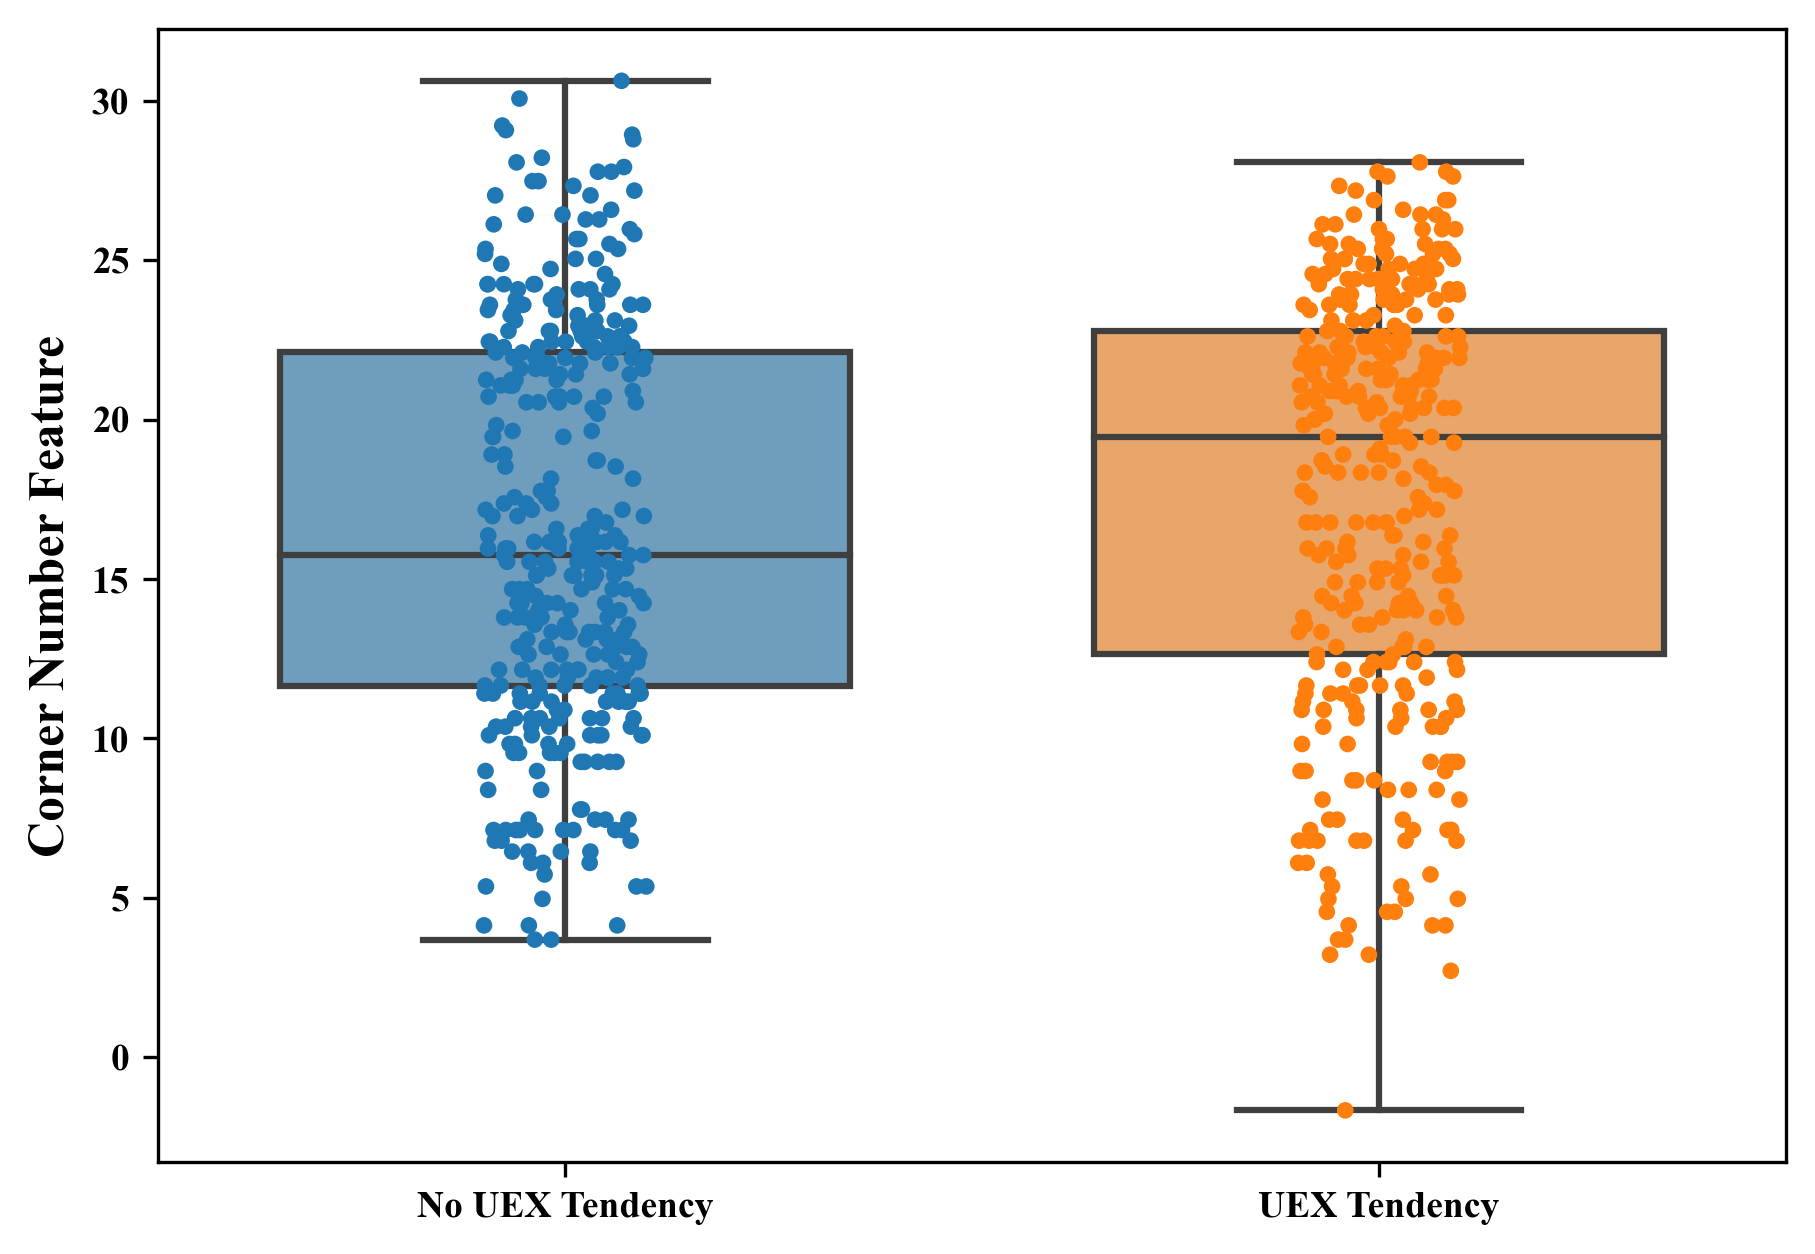

In [33]:
fig, ax = plt.subplots(figsize=(7,5),dpi=300)
sns.boxplot(x='class', y='corner_number', data=feature_df,width=0.7)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
sns.stripplot(x='class', y='corner_number', data=feature_df, jitter=True, edgecolor='white', size=4)
plt.yticks(fontproperties='Times New Roman', size=9, weight='bold')  #设置大小及加粗
plt.xticks(fontproperties='Times New Roman', size=9, weight='bold')
ax.set_ylabel('Corner Number Feature',fontdict= {'family' : 'Times New Roman', 'size' : 12,'weight':'bold'})
ax.set(xlabel=None)
store_path = "./ROC曲线图片/Boxplot/two_class/corner_number_two_class"+".png"
plt.savefig(store_path)

### 2.trajectory distance绘制

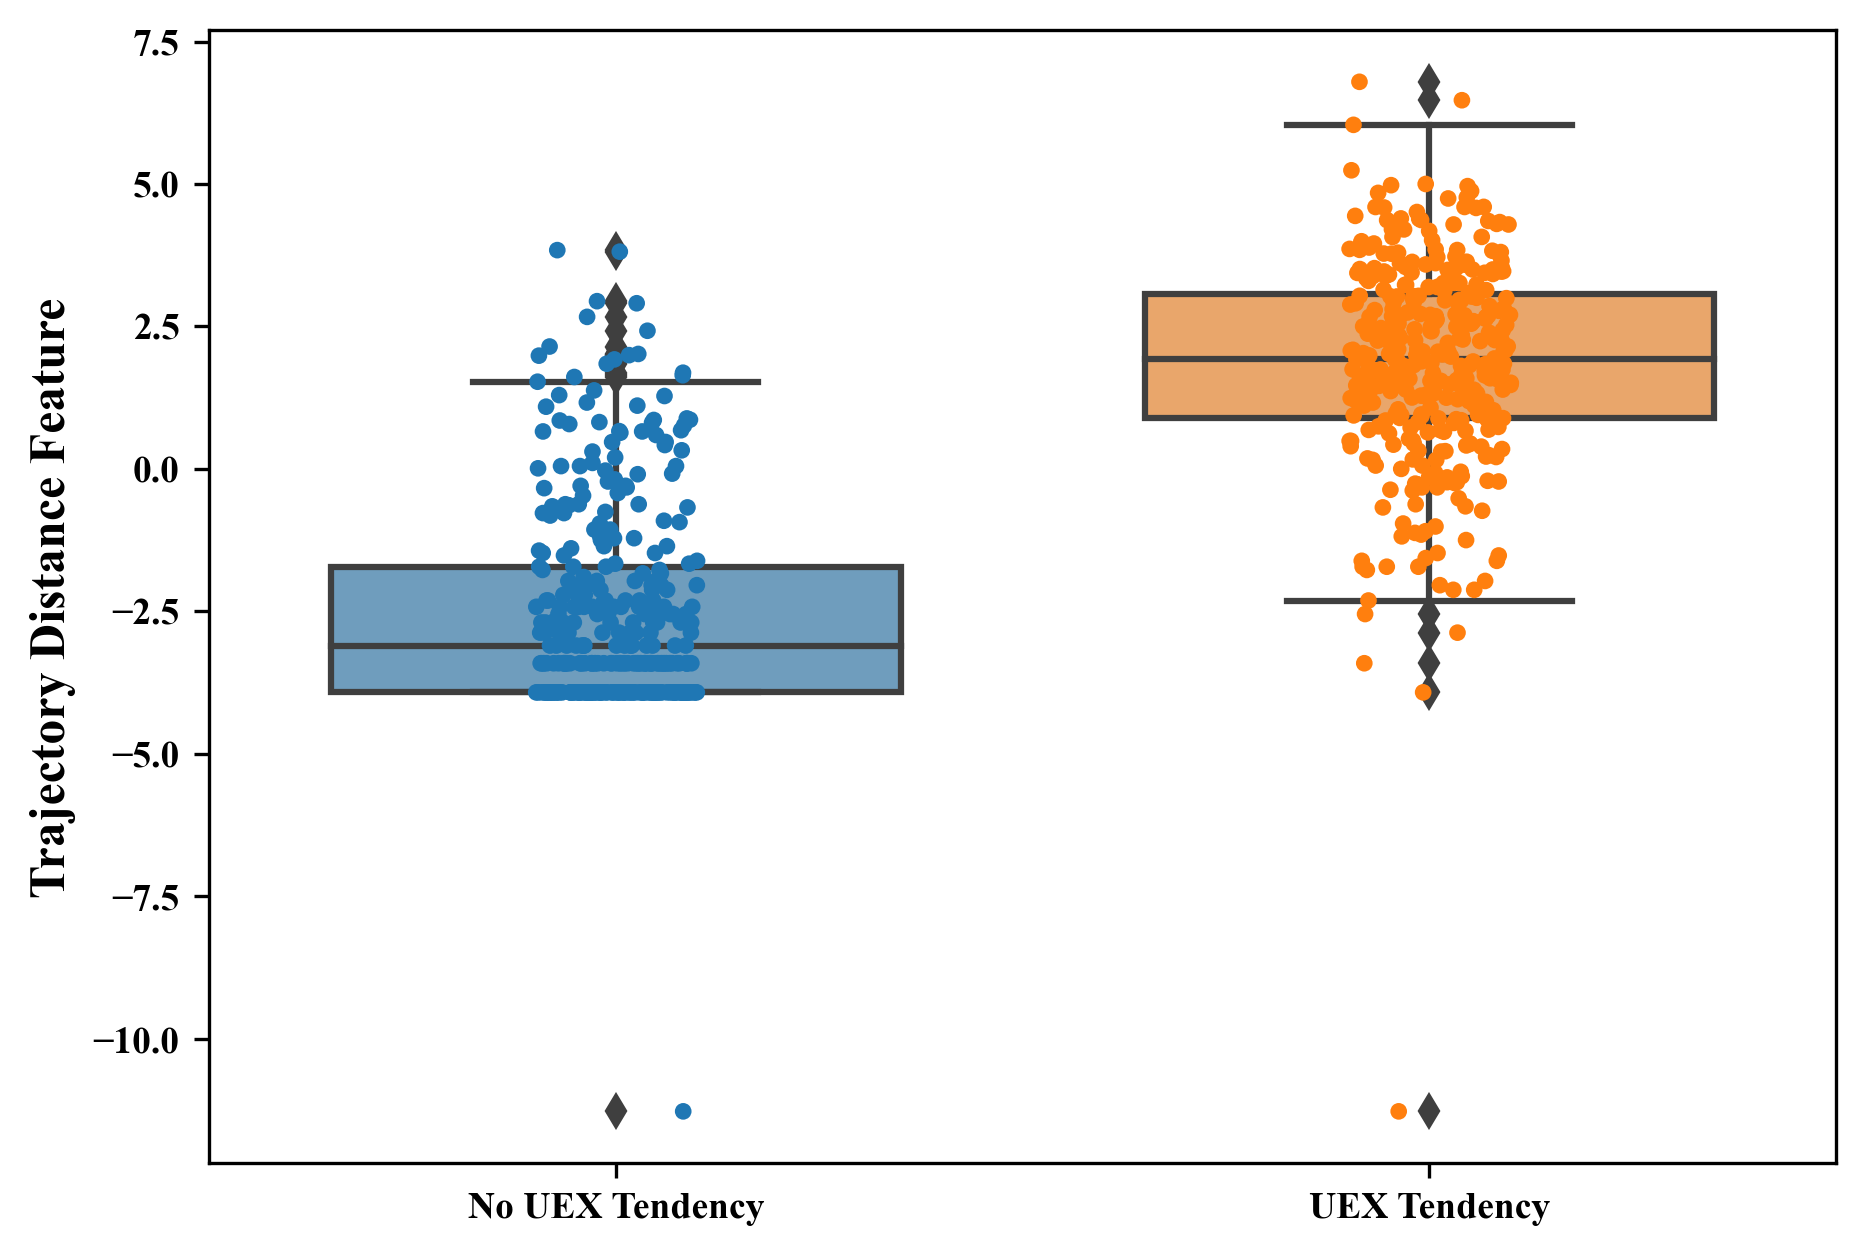

In [34]:
fig, ax = plt.subplots(figsize=(7,5),dpi=300)
sns.boxplot(x='class', y='trajectory_distance', data=feature_df,width=0.7)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
sns.stripplot(x='class', y='trajectory_distance', data=feature_df, jitter=True, edgecolor='white', size=4)
plt.yticks(fontproperties='Times New Roman', size=9, weight='bold')  #设置大小及加粗
plt.xticks(fontproperties='Times New Roman', size=9, weight='bold')
ax.set_ylabel('Trajectory Distance Feature',fontdict= {'family' : 'Times New Roman', 'size' : 12,'weight':'bold'})
ax.set(xlabel=None)
store_path = "./ROC曲线图片/Boxplot/two_class/trajectory_distance_two_class"+".png"
plt.savefig(store_path)

### 3.wavelet 绘制

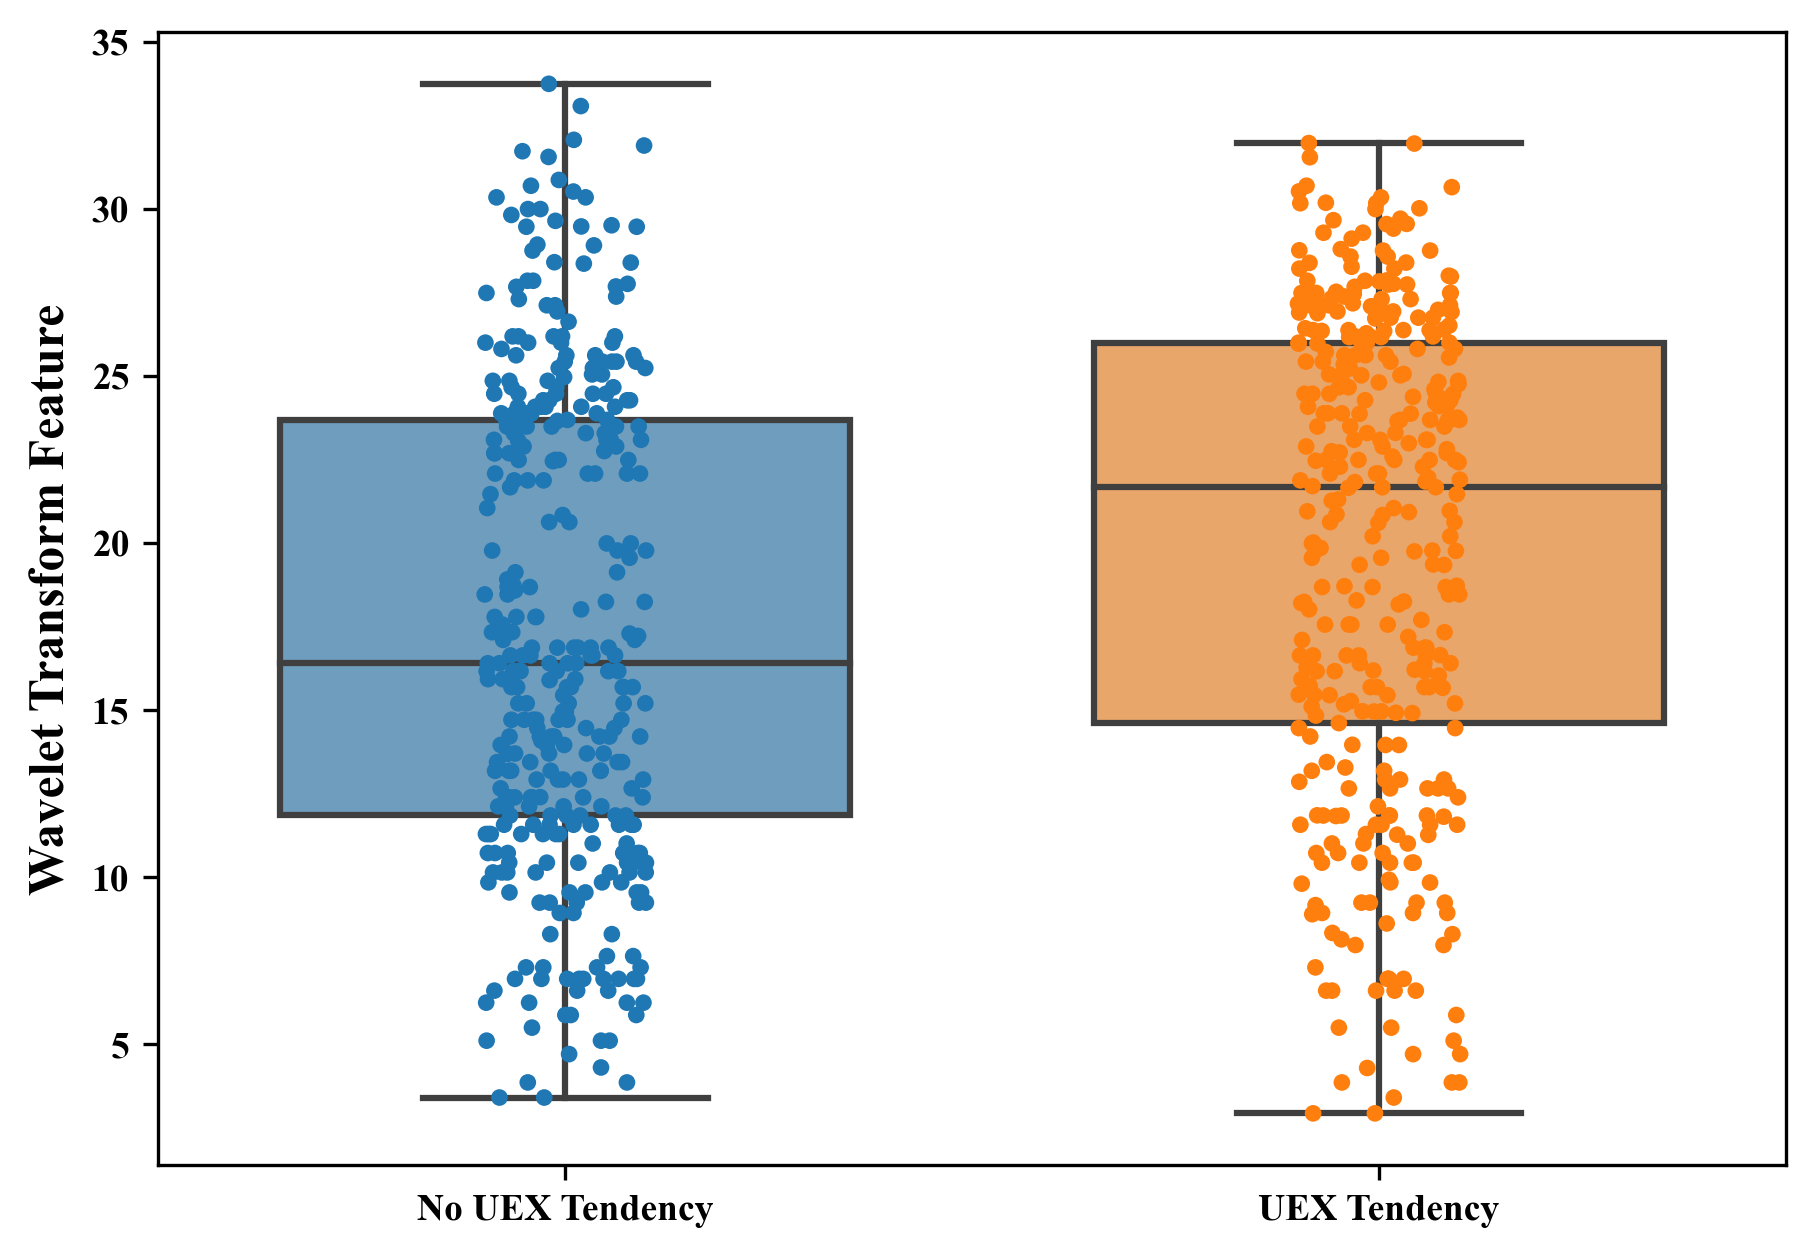

In [35]:
fig, ax = plt.subplots(figsize=(7,5),dpi=300)
sns.boxplot(x='class', y='wavelet_sum', data=feature_df,width=0.7)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
sns.stripplot(x='class', y='wavelet_sum', data=feature_df, jitter=True, edgecolor='white', size=4)
plt.yticks(fontproperties='Times New Roman', size=9, weight='bold')  #设置大小及加粗
plt.xticks(fontproperties='Times New Roman', size=9, weight='bold')
ax.set_ylabel('Wavelet Transform Feature',fontdict= {'family' : 'Times New Roman', 'size' : 12,'weight':'bold'})
ax.set(xlabel=None)
store_path = "./ROC曲线图片/Boxplot/two_class/wavelet_transform_two_class"+".png"
plt.savefig(store_path)

### 4.绘制三类特征在一张图

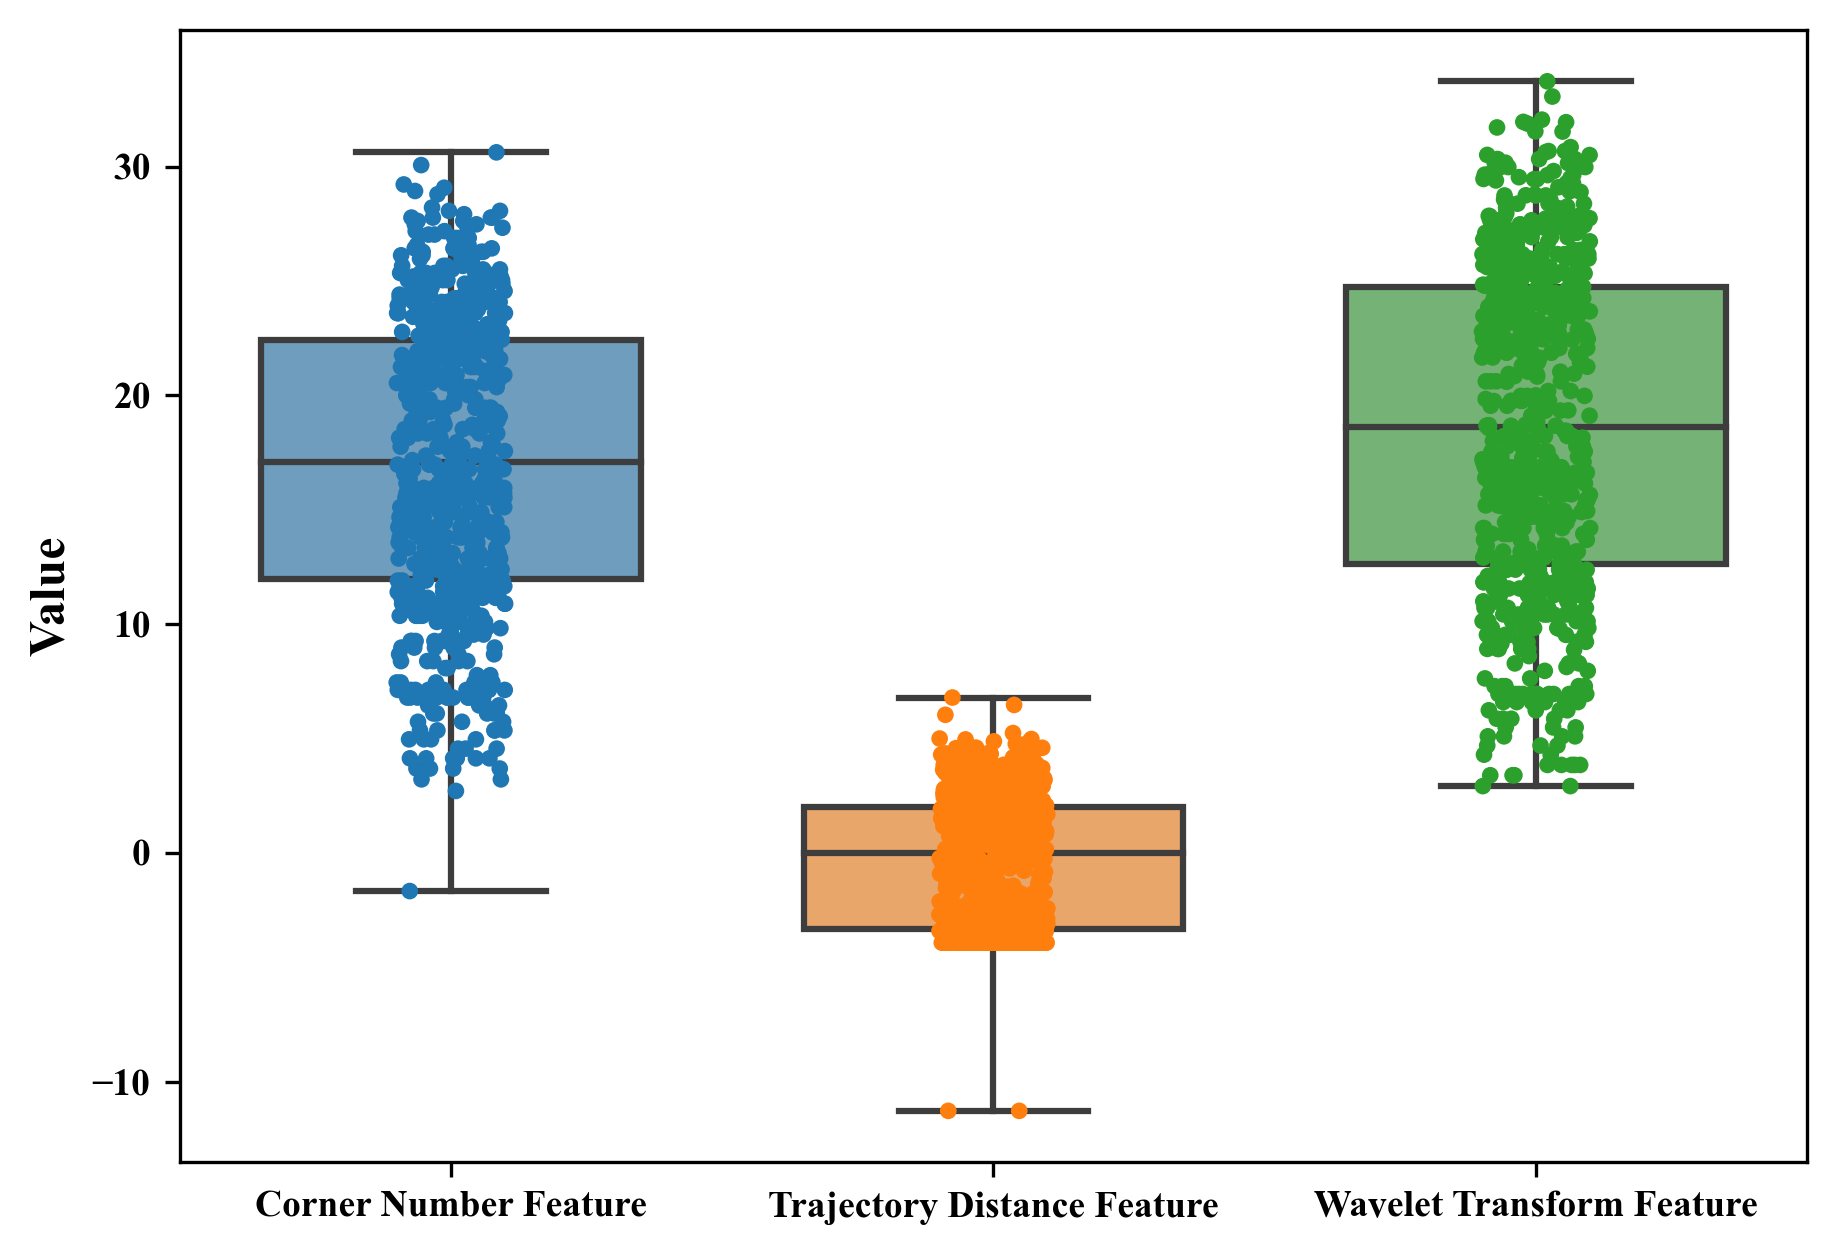

In [36]:
fig, ax = plt.subplots(figsize=(7,5),dpi=300)
three_feature = feature_df[['corner_number','trajectory_distance','wavelet_sum']]
sns.boxplot(data=three_feature,width=0.7)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.7))
sns.stripplot(data=three_feature,jitter=True, edgecolor='white', size=4)
plt.yticks(fontproperties='Times New Roman', size=9, weight='bold')  #设置大小及加粗
plt.xticks(fontproperties='Times New Roman', size=9, weight='bold')
ax.set_xticklabels(['Corner Number Feature','Trajectory Distance Feature','Wavelet Transform Feature'])
ax.set_ylabel('Value',fontdict= {'family' : 'Times New Roman', 'size' : 12,'weight':'bold'})
ax.set(xlabel=None)
store_path = "./ROC曲线图片/Boxplot/two_class/ST_Feature_two_class"+".png"
plt.savefig(store_path)

### 5.将上述三类特征合并，绘制子图

Text(0.5, 1.0, 'wavelet transform feature boxplot')

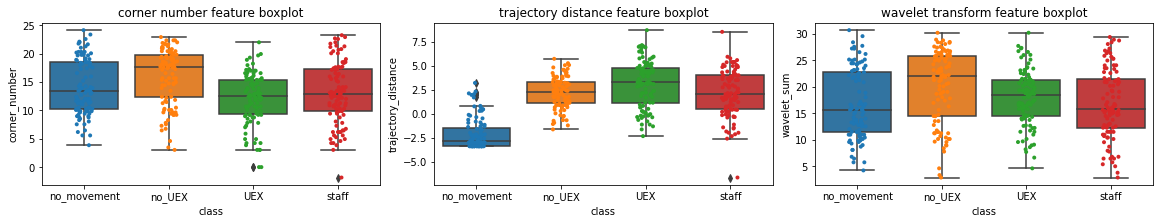

In [240]:
fig, ax =plt.subplots(1,3,constrained_layout=True, figsize=(16, 3))
sns.boxplot(x='class', y='corner_number', data=feature_df,ax=ax[0])
sns.stripplot(x='class', y='corner_number', data=feature_df, jitter=True, edgecolor='white', size=4,ax=ax[0])
ax[0].set_title('corner number feature boxplot')

sns.boxplot(x='class', y='trajectory_distance', data=feature_df,ax=ax[1])
sns.stripplot(x='class', y='trajectory_distance', data=feature_df, jitter=True, edgecolor='white', size=4,ax=ax[1])
ax[1].set_title('trajectory distance feature boxplot')

sns.boxplot(x='class', y='wavelet_sum', data=feature_df,ax=ax[2])
sns.stripplot(x='class', y='wavelet_sum', data=feature_df, jitter=True, edgecolor='white', size=4,ax=ax[2])
ax[2].set_title('wavelet transform feature boxplot')